# Laboratorio 7: Selección de Atributos

Integrantes: Pablo Arroyo Martínez (Sección 2) // Natalia Valencia Valenzuela (Sección 2)

# Instrucciones


1. Trabajen en equipos de dos personas.

2. Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda.

3. El formato de entrega para esta actividad es un archivo html, **no se revisarán entregas en otro formato**. Genere un archivo HTML y súbalo a U-Cursos. Basta con que uno de los integrantes haga la entrega. Si ambos hacen una entrega en U-Cursos, se revisará cualquiera de éstas.

# Datos

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

In [77]:
X.shape

(1797, 64)

In [78]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

# Análisis Exploratorio

**P0** - Para cada parte de esta sección, responda adicionalmente las siguientes preguntas:
1. ¿Qué puede decir de los datos a partir de estos reusultados?
2. ¿Considera que hay que remover alguna columna?

Si la respuesta de la segunda pregunta es afirmativa, elimine esas columnas. Guarde cada modificación que haga sobre los datos en una nueva variable `X2` y mantenga `X` sin modificar.

**P1** - Determine la proporción de los datos que es igual a $0$ y si existen columnas que sólo contienen este valor.

In [79]:
prop_ceros = np.sum(X == 0) / X.size
print(f"Proporción de ceros: {prop_ceros:.4f}")

columnas_ceros = np.all(X == 0, axis=0)
print(f"Número de columnas con solo ceros: {np.sum(columnas_ceros)}")

indices_columnas_ceros = np.where(columnas_ceros)[0]
print("Índices de columnas que solo contienen ceros:", indices_columnas_ceros)

Proporción de ceros: 0.4893
Número de columnas con solo ceros: 3
Índices de columnas que solo contienen ceros: [ 0 32 39]


**Respuesta:** Se deberían eliminar aquellas 3 columnas que tienen solo valores 0, ya que no aportan nada.


In [80]:
X2 = np.delete(X, indices_columnas_ceros, axis=1)
print(X2.shape)

(1797, 61)


**P2** - Visualize la matriz de correlación para `X2`. Dada la cantidad de columnas, puede ser útil visualizar también la matriz son subconjuntos más pequeños para un análisis más preciso.

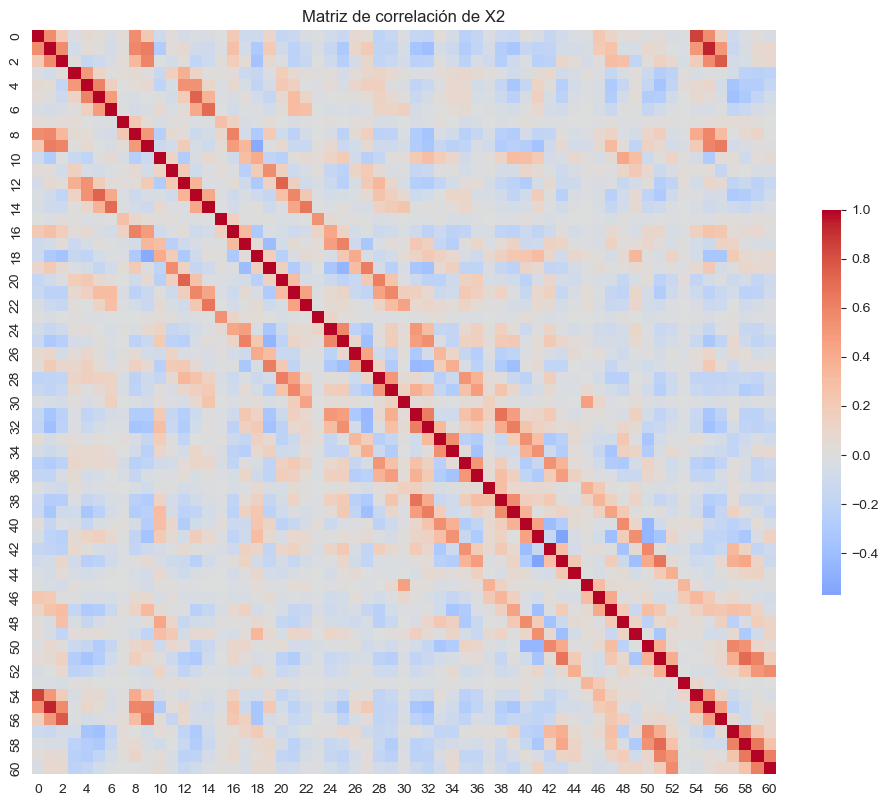

In [81]:
matriz_corr = np.corrcoef(X2, rowvar=False)

plt.figure(figsize=(12, 10))
sns.heatmap(matriz_corr, cmap='coolwarm', center=0, square=True, cbar_kws={"shrink": 0.5})
plt.title("Matriz de correlación de X2")
plt.show()

**Respuesta:** Eliminar alguna de las columnas fuertemente relacionadas para evitar redundancia (valores cercanos a -1 o 1)

In [82]:
umbral = 0.8

columnas_a_eliminar = set()
for i in range(matriz_corr.shape[0]):
    for j in range(i + 1, matriz_corr.shape[1]):
        if abs(matriz_corr[i, j]) > umbral:
            columnas_a_eliminar.add(j)

X2 = np.delete(X2, list(columnas_a_eliminar), axis=1)
print(X2.shape)

(1797, 59)


**P3** - Calcule la varianza de los datos.

In [83]:
varianzas = np.var(X2, axis=0)
print(varianzas)

[8.22539514e-01 2.25957923e+01 1.80426111e+01 1.83714668e+01
 3.20904221e+01 1.10546255e+01 1.07556433e+00 8.87276110e-03
 1.02097566e+01 2.93758249e+01 1.58120413e+01 2.28613044e+01
 3.66179365e+01 1.28545405e+01 6.85061884e-01 3.88763936e-03
 1.27828134e+01 3.23668069e+01 3.36521458e+01 3.81183987e+01
 3.83854244e+01 1.06208369e+01 1.92260705e-01 1.11172736e-03
 9.89515699e+00 3.83199960e+01 3.45896825e+01 3.78271843e+01
 3.44677176e+01 1.35823949e+01 2.22097734e-03 1.21062508e+01
 3.99794098e+01 3.92708623e+01 3.51867141e+01 3.44453245e+01
 1.25054061e+01 2.10670787e-02 8.88628020e+00 4.27210645e+01
 4.14682555e+01 3.91596797e+01 3.24209712e+01 1.87467005e+01
 9.44150719e-02 4.16838922e-02 3.04735308e+00 3.18426060e+01
 2.73057786e+01 2.80960743e+01 3.63545816e+01 2.41870885e+01
 9.68505910e-01 5.56173354e-04 1.91272977e+01 2.43302896e+01
 3.47979731e+01 1.67232706e+01 3.45812736e+00]


**Respuesta:** Eliminar columnas con varianza muy cercanas o iguales a 0, ya que no aportan info o pueden introducir ruido o redundancias.

In [84]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
X2 = selector.fit_transform(X2)
print(X2.shape)

(1797, 54)


# Selección de Atributos

In [85]:
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

**P4** - Selecciones las 30 mejores columnas según el criterio de información mutua.

In [87]:
selector = SelectKBest(score_func=mutual_info_classif, k=30)

X3_train = selector.fit_transform(X_train, y_train)
X3_test = selector.transform(X_test)

print(X_train.shape)
print(X3_train.shape)

selected_columns = selector.get_support(indices=True)
print(selected_columns)

(1257, 64)
(1257, 30)
[ 2  9 10 13 18 19 20 21 26 27 28 29 30 33 34 35 36 37 38 42 43 44 46 51
 53 54 58 60 61 62]


**P5** - Seleccione las columnas más útiles según los resultados de un árbol de clasificación. Seleccione un máximo de 30.

In [88]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

selector = SelectFromModel(clf, max_features=30, prefit=True)
X4_train = selector.transform(X_train)
X4_test = selector.transform(X_test)

print(X_train.shape)
print(X4_train.shape)

selected_features = selector.get_support(indices=True)
print(selected_features)

(1257, 64)
(1257, 16)
[ 5 20 21 26 27 28 33 34 36 37 38 42 43 44 54 60]


# Clasificación

**P6** - Entrene y evalue un clasificador SVC para el dataset sin reducir y cada una de las reducciones hechas en las preguntas anteriores. Para cada caso mida el tiempo de entrenamiento y grafique la matriz de confusión, luego compare y comente los resultados.

In [89]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

import timeit

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, stratify=y, random_state=0)

def plot_confusion_matrix(x_tr, x_te, y_tr, y_te, dataset):
    modelo = SVC()
    tiempo = timeit.timeit(lambda: modelo.fit(x_tr, y_tr), number=1)
    predicciones = modelo.predict(x_te)
    acc = accuracy_score(y_te, predicciones)
    mat = confusion_matrix(y_te, predicciones)

    plt.figure(figsize=(6, 4))
    sns.heatmap(mat, annot=True, cmap='Reds')
    plt.title(f"{dataset}\nTiempo: {tiempo:.3f}s\nPrecisión: {acc:.3f}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

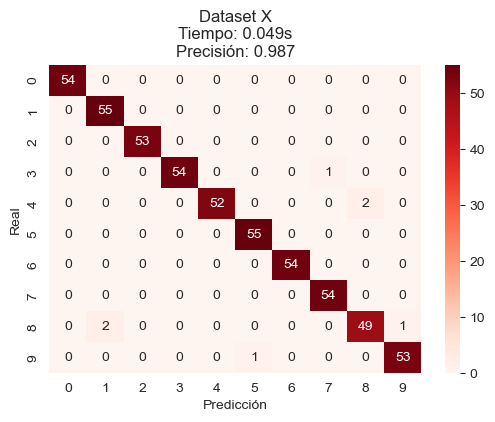

In [90]:
plot_confusion_matrix(X_train, X_test, y_train, y_test, "Dataset X")

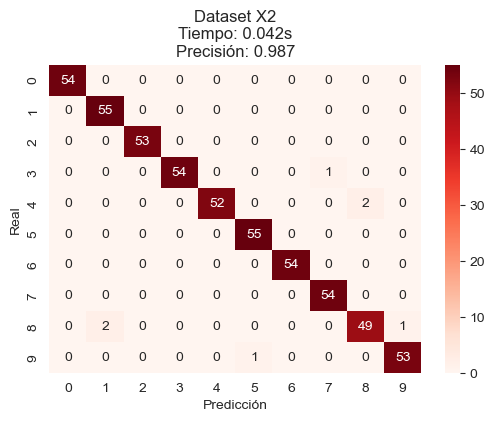

In [91]:
plot_confusion_matrix(X2_train, X2_test, y_train, y_test, "Dataset X2")

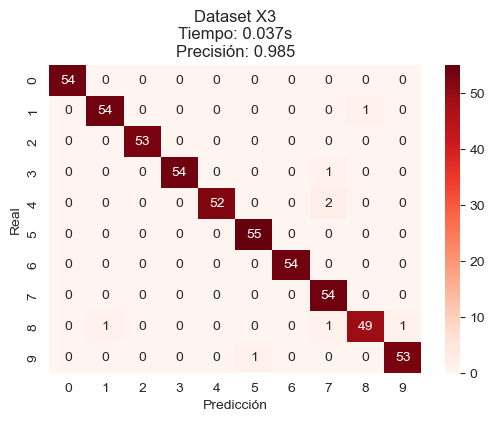

In [92]:
plot_confusion_matrix(X3_train, X3_test, y_train, y_test, "Dataset X3")

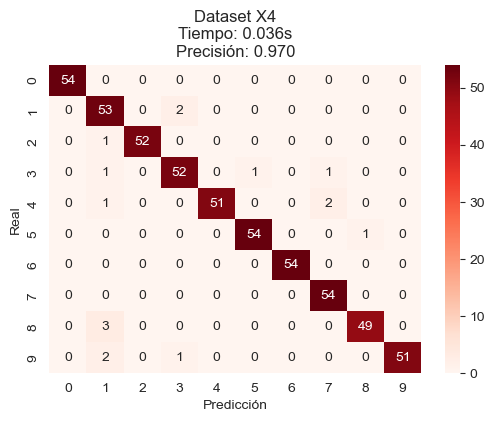

In [95]:
plot_confusion_matrix(X4_train, X4_test, y_train, y_test, "Dataset X4")

Los modelos entrenados con los dataset X y X2 obtienen la misma precisión, por lo que no hubo una mejoría en precisión después de eliminar las columnas con ceros, columnas con poca varianza o columnas fuertemente relacionadas, pero el hecho de haberlas eliminado y que no haya disminuido la precisión da a entender que efectivamente esas columnas eliminadas eran información inútil.
Los modelos entrenados con los dataset X3 y X4 obtienen una precisión un poco menor que los modelos anteriores, aunque la cantidad de columnas es significativamente menor por lo que en contextos donde se tengan muchísimos datos valdría la pena aplicar esos métodos de selección para así reducir el tiempo de procesamiento. En este caso no son muchos datos, por lo que los tiempos entre los 4 modelos son casi iguales, donde cualquiera podría ser el más rapido o más lento por muy poco y que depende de los datos aleatorios obtenidos.